<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme du Lagrangien Augmenté </h1>
</center>

## Implémentation

1. Implémenter l'algorithme du lagrangien augmenté, en utilisant les différentes méthodes
qui ont été vues en première partie pour la résolution de la suite de problémes sans
contraintes (fichier `Lagrangien_Augmente.jl`). La spécification de l'algorithme du Lagrangien augmenté est donnée ci-dessous.
 

In [1]:
using LinearAlgebra
using Documenter
using Markdown  
include("Lagrangien_Augmente.jl")
@doc Lagrangien_Augmente

#### Objet

Résolution des problèmes de minimisation avec une contrainte d'égalité scalaire par l'algorithme du lagrangien augmenté.

#### Syntaxe

```julia
xmin,fxmin,flag,iter,μs,λs = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x₀,options)
```

#### Entrées

  * algo : (String) l'algorithme sans contraintes à utiliser:

      * "newton"  : pour l'algorithme de Newton
      * "cauchy"  : pour le pas de Cauchy
      * "gct"     : pour le gradient conjugué tronqué
  * f : (Function) la fonction à minimiser
  * gradf       : (Function) le gradient de la fonction
  * hessf       : (Function) la hessienne de la fonction
  * c     : (Function) la contrainte [x est dans le domaine des contraintes ssi $c(x)=0$]
  * gradc : (Function) le gradient de la contrainte
  * hessc : (Function) la hessienne de la contrainte
  * x₀ : (Array{Float,1}) la première composante du point de départ du Lagrangien
  * options : (Array{Float,1})

    1. ϵ     : utilisé dans les critères d'arrêt
    2. tol         : la tolérance utilisée dans les critères d'arrêt
    3. itermax     : nombre maximal d'itération dans la boucle principale
    4. λ₀     : la deuxième composante du point de départ du Lagrangien
    5. μ₀, τ    : valeurs initiales des variables de l'algorithme

#### Sorties

  * xmin : (Array{Float,1}) une approximation de la solution du problème avec contraintes
  * fxmin : (Float) $f(x_{min})$
  * flag : (Integer) indicateur du déroulement de l'algorithme

      * 0    : convergence
      * 1    : nombre maximal d'itération atteint
      * (-1) : une erreur s'est produite
  * niters : (Integer) nombre d'itérations réalisées
  * μs : (Array{Float64,1}) tableau des valeurs prises par μₖ au cours de l'exécution
  * λs : (Array{Float64,1}) tableau des valeurs prises par λₖ au cours de l'exécution

#### Exemple d'appel

```julia
using LinearAlgebra
algo = "gct" # ou newton|gct
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2
gradf(x)=[-400*x[1]*(x[2]-x[1]^2)-2*(1-x[1]) ; 200*(x[2]-x[1]^2)]
hessf(x)=[-400*(x[2]-3*x[1]^2)+2  -400*x[1];-400*x[1]  200]
c(x) =  (x[1]^2) + (x[2]^2) -1.5
gradc(x) = [2*x[1] ;2*x[2]]
hessc(x) = [2 0;0 2]
x₀ = [1; 0]
options = []
xmin,fxmin,flag,iter,μs,λs = Lagrangien_Augmente(algo,f,gradf,hessf,c,gradc,hessc,x₀,options)
```

#### Tolérances des algorithmes appelés

Pour les tolérances définies dans les algorithmes appelés (Newton et régions de confiance), prendre les tolérances par défaut définies dans ces algorithmes.


3. Vérifier que les tests ci-dessous passent.

In [2]:
using Test

# Tolérance pour les tests d'égalité
tol_erreur = sqrt(eps())

## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../test/tester_lagrangien_augmente.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")

affiche = true

@testset "Test lagrangien augmente" begin
	tester_lagrangien_augmente(affiche, Lagrangien_Augmente)
end;

-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x01 :
  * xsol = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(xsol) = 2.2499999969582634
  * nb_iters = 7
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 1 au point initial x02 :
  * xsol = [0.5000042424566808, 1.2499978787716595, 0.5000042424566811]
  * f(xsol) = 2.2499999969582634
  * nb_iters = 7
  * flag = 0
  * sol_exacte : [0.5, 1.25, 0.5]
-------------------------------------------------------------------------
Résultats de : Lagrangien augmenté avec newton appliqué à fonction 2 au point initial x03 :
  * xsol = [0.9072338874848903, 0.8227553232868374]
  * f(xsol) = 0.008615650657287602
  * nb_iters = 5
  * flag = 0
  * sol_exacte : [0.9072339605110892, 0.8227554

## Interprétation

 1. Commenter les résultats obtenus, en étudiant notamment les valeurs de $\lambda_k$ et $\mu_k$.
 

 
 2. Étudier l'influence du paramètre $\tau$ dans la performance de l'algorithme. Pour cela Vous réaliserez des tests numériques.
 
 3. **Supplémentaire** : 
      Que proposez-vous comme méthode pour la résolution des problèmes avec
      des contraintes à la fois d'égalité et d'inégalité ? Implémenter (si le temps le permet)
      ce nouvel algorithme.


## Réponses

In [3]:
using LaTeXStrings
using Plots
## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")
include("../src/Affichages_Lagrangien.jl")

afficher_lagrangien(Lagrangien_Augmente)


Résultats de : Lagrangien augmenté avec gct appliqué à fonction 1 au point initial x01 : 
μ₀ = 10.0
λ₀ = 2.0
μ_final = 80.0
λ_final = 4.499961817889869
----------------------------------

Résultats de : Lagrangien augmenté avec gct appliqué à fonction 1 au point initial x02 : 
μ₀ = 10.0
λ₀ = 2.0
μ_final = 80.0
λ_final = 4.499961817889869
----------------------------------

Résultats de : Lagrangien augmenté avec gct appliqué à fonction 2 au point initial x03 : 
μ₀ = 10.0
λ₀ = 2.0
μ_final = 40.0
λ_final = 0.03865139008745011
----------------------------------

Résultats de : Lagrangien augmenté avec gct appliqué à fonction 2 au point initial x04 : 
μ₀ = 10.0
λ₀ = 2.0
μ_final = 40.0
λ_final = 0.03865139008745011
----------------------------------



1. Les solutions trouvées sont proches des solutions exactes et sont données en un nombre d'itération relativement faible.

  | cas de test | mu_0 | mu_final | lambda_0 | lambda_final |
  | :-:         | :-:     | :-:           | :-:         | :-: |
  | $f_1 x_{01}$ | 10   | 80           | 2           | $4.5$ |
  | $f_1 x_{02}$ | 10   | 80 | 2 | $4.5$ |
  | $f_2 x_{03}$ | 10   | 40 | 2 | $3.8e-2$ |
  | $f_2 x_{04}$ | 10   | 40 | 2 | $3.8e-2$ |

Les valeurs de $\lambda_k$ et de $\mu_k$
 changent de façon remarquable selon la fonction que l'on étudie,
 ces valeurs sont exactement les mêmes lorsque l'on change d'algorithme pour le calcul du minimum du problème sans contraintes dans la boucle de l'algorithme principal.



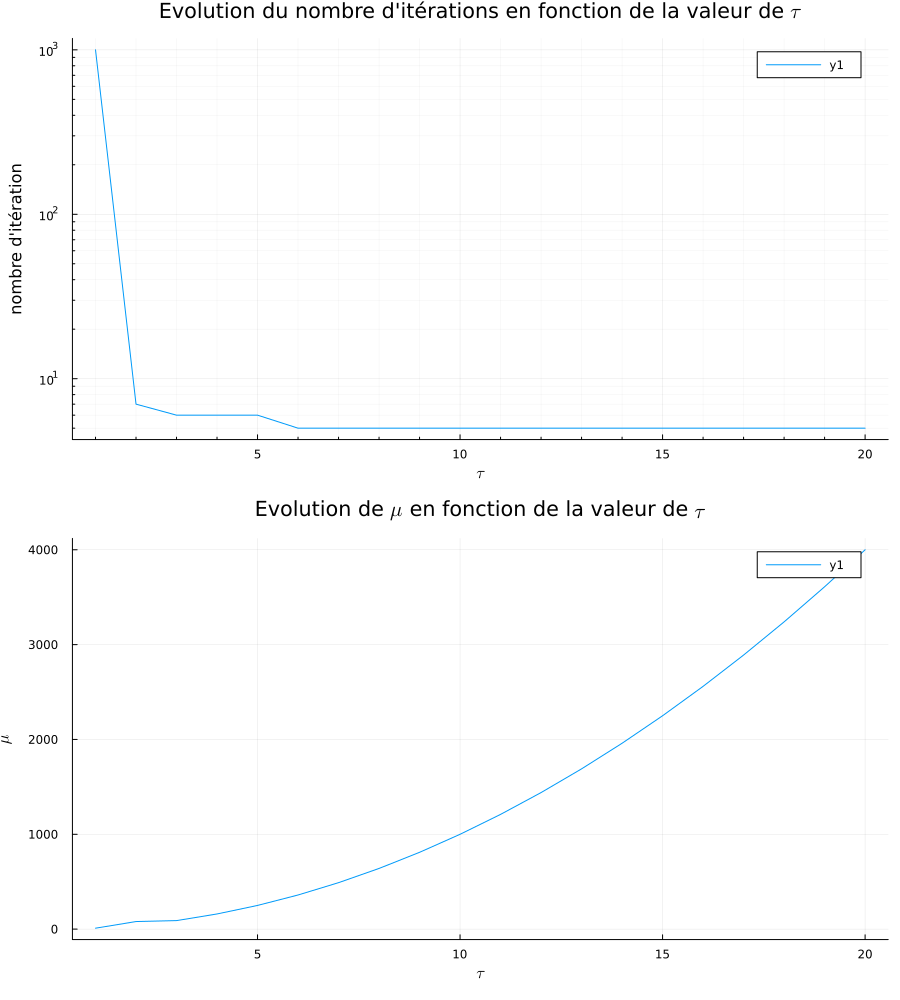

In [4]:
using LaTeXStrings
using Plots
## ajouter les fonctions de test
include("../test/fonctions_de_tests.jl")
include("../src/Algorithme_De_Newton.jl")
include("../src/Pas_De_Cauchy.jl")
include("../src/Gradient_Conjugue_Tronque.jl")
include("../src/Regions_De_Confiance.jl")
include("../src/Lagrangien_Augmente.jl")
include("../src/Affichages_Lagrangien.jl")

comparer_tau(Lagrangien_Augmente)

2. Lorsque l'on augmente la valeur de $\tau$ , le nombre d'itérations nécessaire pour trouver la solution diminue, et la valeur de $\mu_k$
 augmente. En effet la valeur de $\tau$ est utilisée pour mettre à jour la valeur de $\mu_k$ dans le cas où $||c(x_{k+1})|| > \eta_k$.

3. Un problème avec des contraintes d'égalité et d'inégalité peut s'écrire :
$$
(P) : \min \limits_{ x \in \mathbb{R}^n} f(x)\\
c_e(x) = 0\\
c_i(x) \le 0
$$

On peut donc écrire les contraintes d'inégalité comme :
$c_i(x)+s = 0, s\ge 0$  
On a alors une nouvelle contrainte qui devient une égalité dans notre problème, et l'on doit considérer en plus dans le lagrangien 
la condition $s \ge 0$, ainsi que l'ajout aux contraintes déjà présentes des contraintes sur $c_i(x) + s$
.